# Import necessary libraries

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
numpy.random.seed(7)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Load and explore the data

In [41]:
dataset=pd.read_csv("data/hourly_wages.csv")

In [42]:
dataset.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [43]:
dataset.describe(include='all')

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Prepare training and testing data

In [59]:
#create a dataframe with all training data except the target column
X = dataset.drop(columns=['wage_per_hour'])

#check that the target variable has been removed
X.head()

,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,0,8,21,35,1,1,0,1,0
1,0,9,42,57,1,1,0,1,0
2,0,12,1,19,0,0,0,1,0
3,0,12,4,22,0,0,0,0,0
4,0,12,17,35,0,1,0,0,0


In [60]:
#create a dataframe with only the target column
Y = dataset[['wage_per_hour']]

#view dataframe
Y.head()

,wage_per_hour
0,5.10
1,4.95
2,6.67
3,4.00
4,7.50


In [61]:
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size=0.25, random_state=42)

In [62]:
print("Number of image in training set ",len(trainX), len(trainY))
print("Number of image in tesing set ",len(testX), len(testY))

Number of image in training set  400 400
Number of image in tesing set  134 134


# Create a model

In [63]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = X.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

# Compile the model

In [64]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model

In [65]:
# Fit the model
H = model.fit(trainX, trainY, epochs=150, batch_size=10, validation_data=(testX, testY))

Train on 400 samples, validate on 134 samples
Epoch 1/150
400/400 [==============================] - 0s 1ms/step - loss: 195.1347 - mean_squared_error: 195.1347 - val_loss: 67.7407 - val_mean_squared_error: 67.7407
Epoch 2/150
400/400 [==============================] - 0s 95us/step - loss: 39.3336 - mean_squared_error: 39.3336 - val_loss: 21.5470 - val_mean_squared_error: 21.5470
Epoch 3/150
400/400 [==============================] - 0s 108us/step - loss: 21.9839 - mean_squared_error: 21.9839 - val_loss: 21.3484 - val_mean_squared_error: 21.3484
Epoch 4/150
400/400 [==============================] - 0s 123us/step - loss: 21.8871 - mean_squared_error: 21.8871 - val_loss: 21.2858 - val_mean_squared_error: 21.2858
Epoch 5/150
400/400 [==============================] - 0s 117us/step - loss: 21.8196 - mean_squared_error: 21.8196 - val_loss: 21.2481 - val_mean_squared_error: 21.2481
Epoch 6/150
400/400 [==============================] - 0s 109us/step - loss: 21.6624 - mean_squared_error: 21.

400/400 [==============================] - 0s 93us/step - loss: 20.0397 - mean_squared_error: 20.0397 - val_loss: 18.9862 - val_mean_squared_error: 18.9862
Epoch 50/150
400/400 [==============================] - 0s 91us/step - loss: 19.4653 - mean_squared_error: 19.4653 - val_loss: 18.9357 - val_mean_squared_error: 18.9357
Epoch 51/150
400/400 [==============================] - 0s 93us/step - loss: 19.3878 - mean_squared_error: 19.3878 - val_loss: 19.0045 - val_mean_squared_error: 19.0045
Epoch 52/150
400/400 [==============================] - 0s 100us/step - loss: 19.4267 - mean_squared_error: 19.4267 - val_loss: 19.0302 - val_mean_squared_error: 19.0302
Epoch 53/150
400/400 [==============================] - 0s 103us/step - loss: 19.2071 - mean_squared_error: 19.2071 - val_loss: 19.2350 - val_mean_squared_error: 19.2350
Epoch 54/150
400/400 [==============================] - 0s 111us/step - loss: 19.3375 - mean_squared_error: 19.3375 - val_loss: 18.9099 - val_mean_squared_error: 18.9

400/400 [==============================] - 0s 100us/step - loss: 18.7967 - mean_squared_error: 18.7967 - val_loss: 18.7190 - val_mean_squared_error: 18.7190
Epoch 98/150
400/400 [==============================] - 0s 110us/step - loss: 18.9976 - mean_squared_error: 18.9976 - val_loss: 18.8023 - val_mean_squared_error: 18.8023
Epoch 99/150
400/400 [==============================] - 0s 104us/step - loss: 19.0143 - mean_squared_error: 19.0143 - val_loss: 18.5046 - val_mean_squared_error: 18.5046
Epoch 100/150
400/400 [==============================] - 0s 95us/step - loss: 18.8760 - mean_squared_error: 18.8760 - val_loss: 18.6412 - val_mean_squared_error: 18.6412
Epoch 101/150
400/400 [==============================] - 0s 188us/step - loss: 19.0036 - mean_squared_error: 19.0036 - val_loss: 18.7448 - val_mean_squared_error: 18.7448
Epoch 102/150
400/400 [==============================] - 0s 104us/step - loss: 19.0619 - mean_squared_error: 19.0619 - val_loss: 18.6563 - val_mean_squared_error:

400/400 [==============================] - 0s 90us/step - loss: 18.8257 - mean_squared_error: 18.8257 - val_loss: 18.8906 - val_mean_squared_error: 18.8906
Epoch 146/150
400/400 [==============================] - 0s 101us/step - loss: 18.8056 - mean_squared_error: 18.8056 - val_loss: 18.8173 - val_mean_squared_error: 18.8173
Epoch 147/150
400/400 [==============================] - 0s 95us/step - loss: 18.7404 - mean_squared_error: 18.7404 - val_loss: 18.7865 - val_mean_squared_error: 18.7865
Epoch 148/150
400/400 [==============================] - 0s 97us/step - loss: 18.9633 - mean_squared_error: 18.9633 - val_loss: 19.5745 - val_mean_squared_error: 19.5745
Epoch 149/150
400/400 [==============================] - 0s 115us/step - loss: 18.7562 - mean_squared_error: 18.7562 - val_loss: 18.8241 - val_mean_squared_error: 18.8241
Epoch 150/150
400/400 [==============================] - 0s 95us/step - loss: 18.8538 - mean_squared_error: 18.8538 - val_loss: 18.8159 - val_mean_squared_error: 

# Evaluate the results

In [66]:
# evaluate the model : train
scores = model.evaluate(trainX, trainY)
print(scores)

# # evaluate the model : test
scores = model.evaluate(testX, testY)
print(scores)

print(model.metrics_names)

400/400 [==============================] - 0s 38us/step
[18.487678985595704, 18.487678985595704]
134/134 [==============================] - 0s 51us/step
[18.81590819002977, 18.81590819002977]
['loss', 'mean_squared_error']


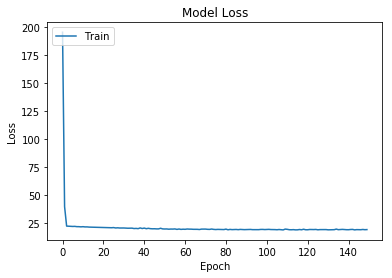

In [67]:
# Plot training & validation accuracy values
plt.plot(H.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Prediction

In [68]:
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded[1])

7.0
